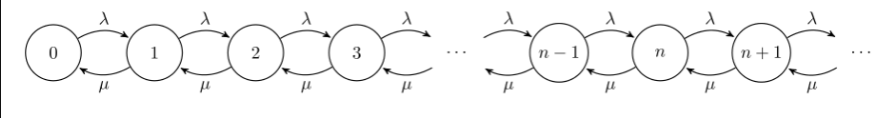

$$\Omega = \left\{ \omega = (\omega_1, \omega_2, ..., \omega_n, ...): \omega_i \in \left\{ 0, 1, 2, ...\right\} \right\}$$
$$\mathcal{F}=2^\Omega$$
$$P(\omega_{i+1}=k+1 \;|\; \omega_i=k)=\frac{\lambda}{\mu + \lambda}$$
$$P(\omega_{i+1}=k-1 \;|\; \omega_i=k)=\frac{\mu}{\mu + \lambda}$$
$$P(\omega_{i+1}=1 \;|\; \omega_i=0)=1$$
$$$$

In [1]:
from queue_simulation.markovian import Markovian

import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio

from plotly.subplots import make_subplots

In [2]:
def plot_metrics_time_dependency(lmbd: float, mu: float, runs: int = 10000) -> None:
    queue = Markovian(lmbd, mu)
    metrics = queue.run(10000)
    print(f"Average Queue Size = {metrics['Average Queue Size']}")
    print(f"Average System Time = {metrics['Average System Time']}")

    fig = make_subplots(rows=2, cols=1, subplot_titles=("Average Queue Size", "Average System Time"))

    fig.add_trace(
        go.Scatter(x=list(range(len(metrics["Average Queue Size Per Moment"]))), y=metrics["Average Queue Size Per Moment"]), 
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=list(range(len(metrics["Average System Time Per Moment"]))), y=metrics["Average System Time Per Moment"]), 
        row=2, col=1
    )

    fig.update_layout(
        title_text=f"λ = {lmbd}, µ = {mu}",
        height=800, width=1200
    )

    fig.show("svg")

Average Queue Size = 0.1829640170766416
Average System Time = 0.5167039849945307


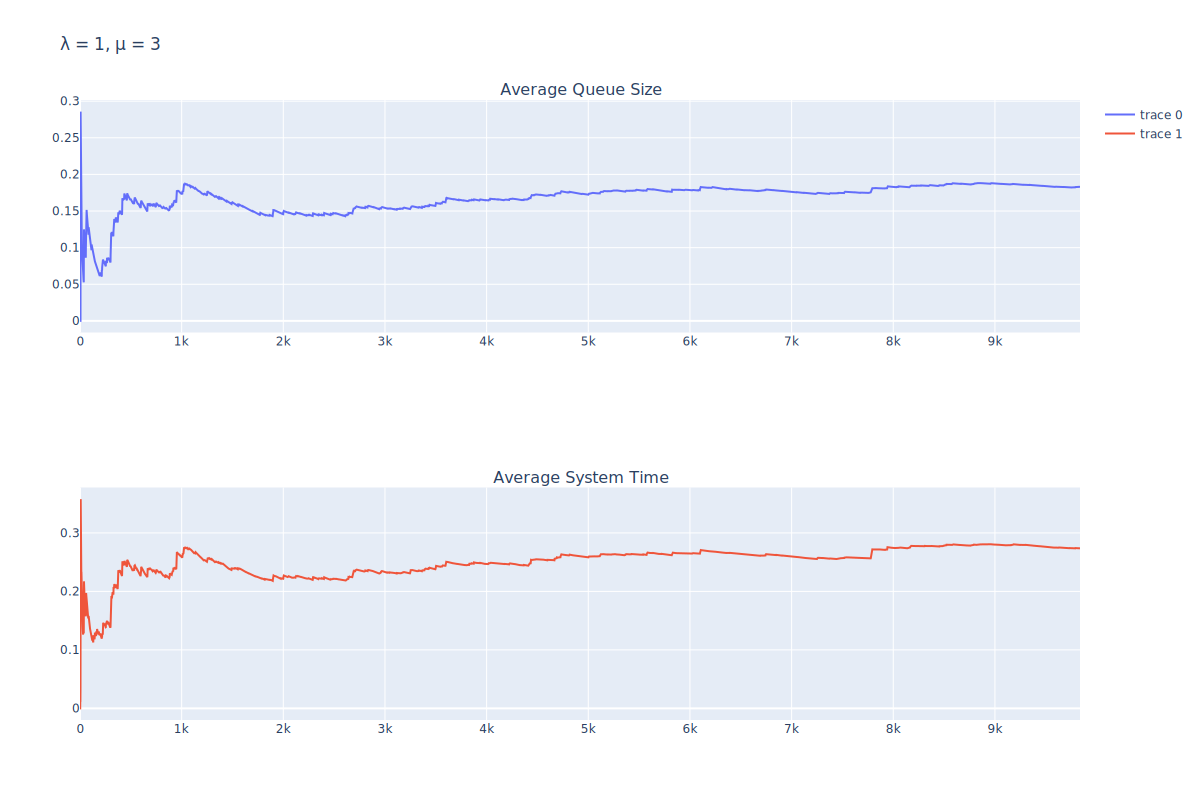

In [3]:
plot_metrics_time_dependency(1, 3)

Average Queue Size = 0.005387273836145558
Average System Time = 0.07210729083361113


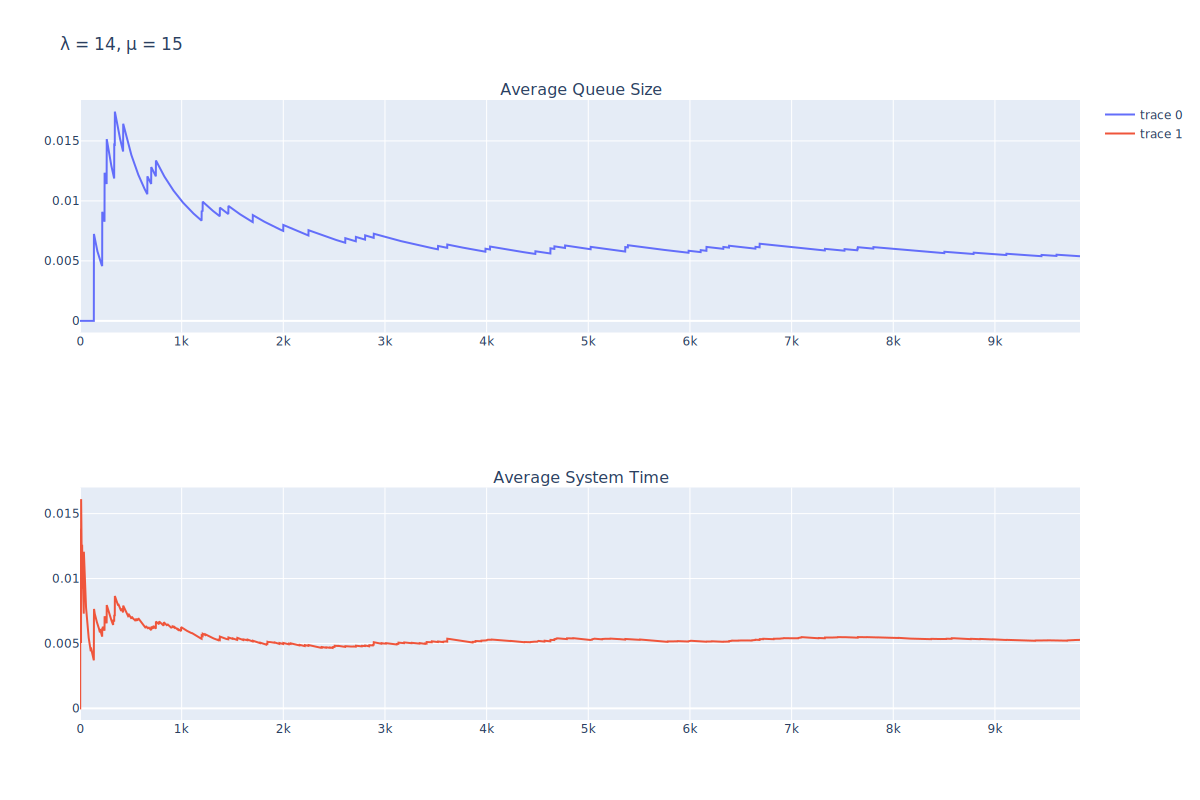

In [4]:
plot_metrics_time_dependency(14, 15)

Average Queue Size = 109.5075561741897
Average System Time = 111.1405545403654


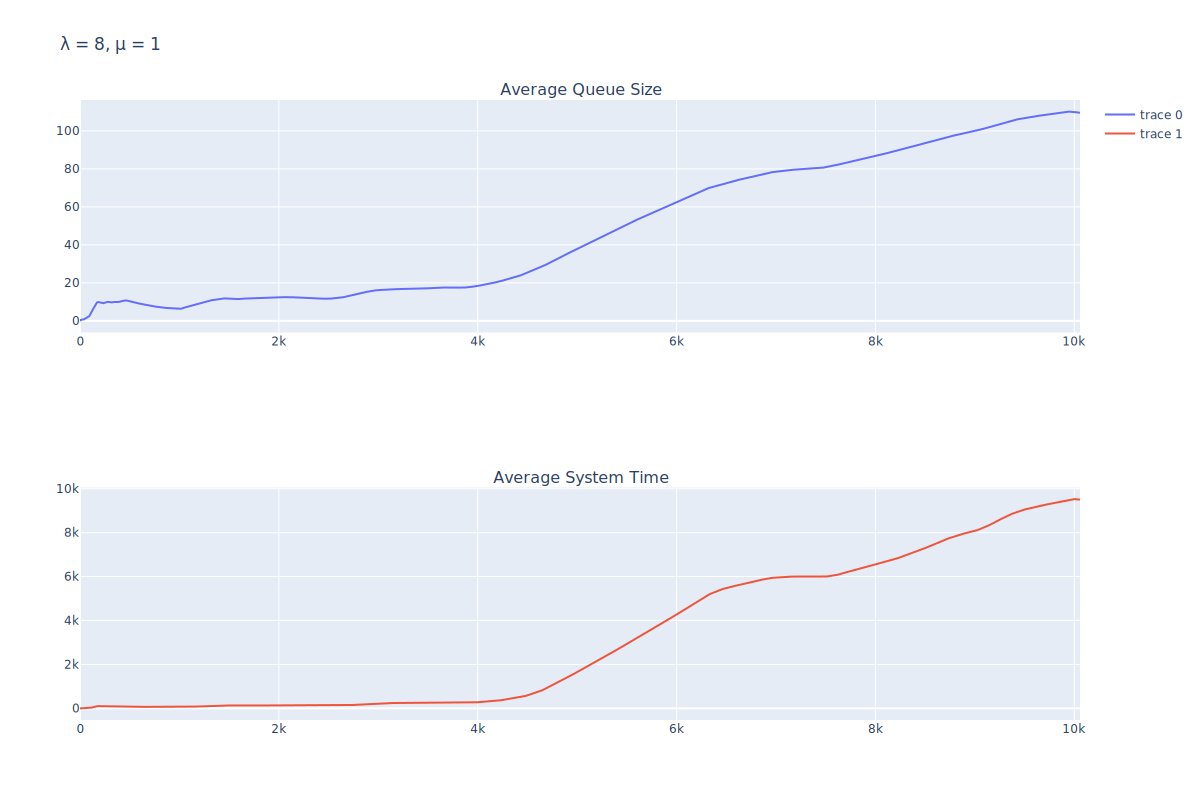

In [5]:
plot_metrics_time_dependency(8, 1)

In [17]:
from tqdm.notebook import tqdm
from typing import List, Union

def plot_metrics_parameter_dependency(lmda: Union[List[float], float], 
                                      mu: Union[List[float], float], 
                                      plot_theoretical: bool = False) -> None:
    assert type(lmda) != type(mu)

    if plot_theoretical:
        fig = make_subplots(rows=2, cols=2, subplot_titles=("Average Queue Size (theoretical)", "Average Queue Size (experimental)", 
                                                        "Average System Time (theoretical)", "Average System Time (experimental)"))
    else:
        fig = make_subplots(rows=2, cols=1, subplot_titles=("Average Queue Size", "Average System Time"))

    avg_queue_size = []
    avg_system_time = []
    parameter_values = []
    if isinstance(lmda, list):
        for _, cur_lmda in tqdm(enumerate(lmda)):
            queue = Markovian(cur_lmda, mu)
            metrics = queue.run(10000)
            avg_queue_size.append(metrics["Average Queue Size"])
            avg_system_time.append(metrics["Average System Time"])
            parameter_values.append(float(cur_lmda))
        queue_size_estimates = [(float(cur_lmda) * float(cur_lmda)) / (mu * (mu - float(cur_lmda))) for cur_lmda in lmda]
        system_time_estimates = [1 / (mu - float(cur_lmda)) for cur_lmda in lmda]
    else:
        for _, cur_mu in tqdm(enumerate(mu)):
            queue = Markovian(lmda, cur_mu)
            metrics = queue.run(10000)
            avg_queue_size.append(metrics["Average Queue Size"])
            avg_system_time.append(metrics["Average System Time"])
            parameter_values.append(float(cur_mu))
        queue_size_estimates = [(lmda * lmda) / (float(cur_mu) * (float(cur_mu) - lmda)) for cur_mu in mu]
        system_time_estimates = [1 / (float(cur_mu) - lmda) for cur_mu in mu]
        
    if plot_theoretical:
        fig.add_trace(go.Scatter(x=parameter_values, y=queue_size_estimates), row=1, col=1)
        fig.add_trace(go.Scatter(x=parameter_values, y=avg_queue_size), row=1, col=2)
        fig.add_trace(go.Scatter(x=parameter_values, y=system_time_estimates), row=2, col=1)
        fig.add_trace(go.Scatter(x=parameter_values, y=avg_system_time), row=2, col=2)
        fig.update_xaxes(title_text="λ" if isinstance(lmda, list) else "µ", row=1, col=1)
        fig.update_xaxes(title_text="λ" if isinstance(lmda, list) else "µ", row=1, col=2)
        fig.update_xaxes(title_text="λ" if isinstance(lmda, list) else "µ", row=2, col=1)
        fig.update_xaxes(title_text="λ" if isinstance(lmda, list) else "µ", row=2, col=2)
        fig.update_yaxes(title_text="Queue Size", row=1, col=1)
        fig.update_yaxes(title_text="Queue Size", row=1, col=2)
        fig.update_yaxes(title_text="System Time", row=2, col=1)
        fig.update_yaxes(title_text="System Time", row=2, col=2)
    else:
        fig.add_trace(go.Scatter(x=parameter_values, y=queue_size_estimates), row=1, col=1)
        fig.add_trace(go.Scatter(x=parameter_values, y=avg_system_time), row=2, col=1)
        fig.update_xaxes(title_text="λ" if isinstance(lmda, list) else "µ", row=1, col=1)
        fig.update_xaxes(title_text="λ" if isinstance(lmda, list) else "µ", row=2, col=1)
        fig.update_yaxes(title_text="Queue Size", row=1, col=1)
        fig.update_yaxes(title_text="Queue Size", row=2, col=1)
    print(type(parameter_values[0]))
    print(type(avg_queue_size[0]))

    fig.update_layout(
        height=720, width=1280, 
        title_text=(f"λ = {lmda}, " if not isinstance(lmda, list) else f"µ = {mu}, ") + ("λ < µ" if plot_theoretical else f"")
    )

    fig.show("svg")

0it [00:00, ?it/s]

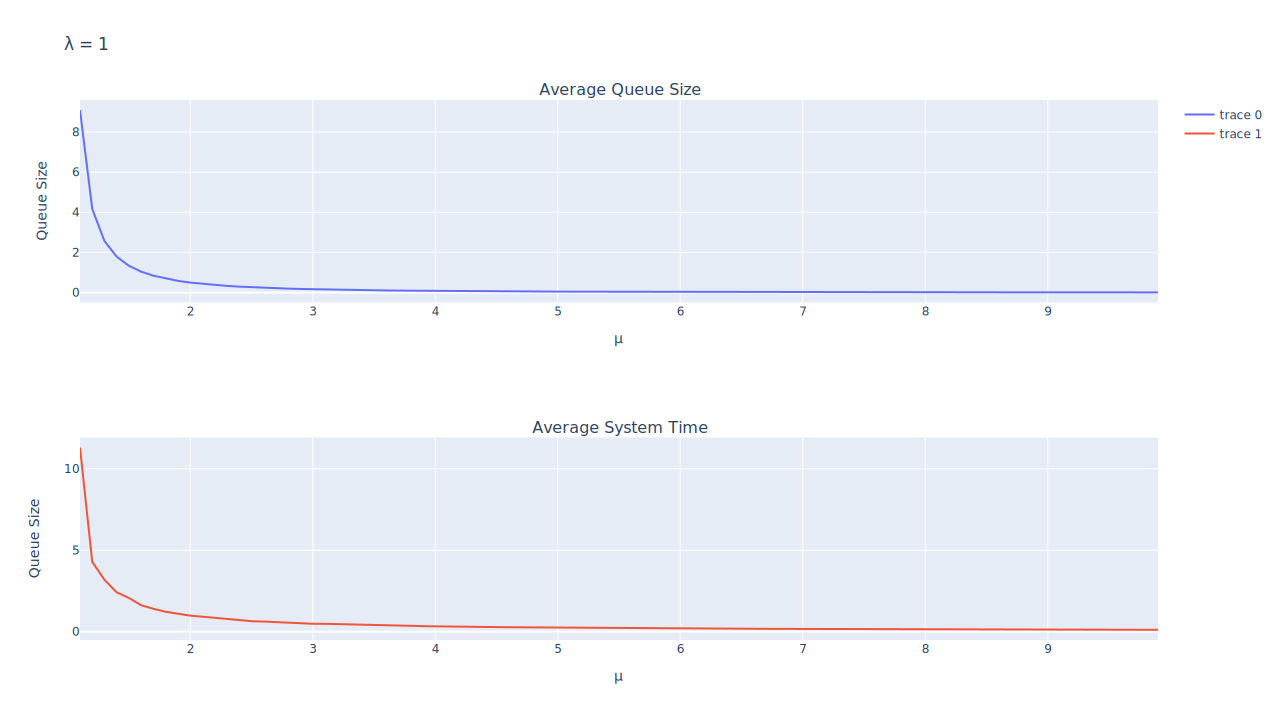

In [23]:
plot_metrics_parameter_dependency(1, list(np.arange(1.1, 10.0, 0.1)))

0it [00:00, ?it/s]

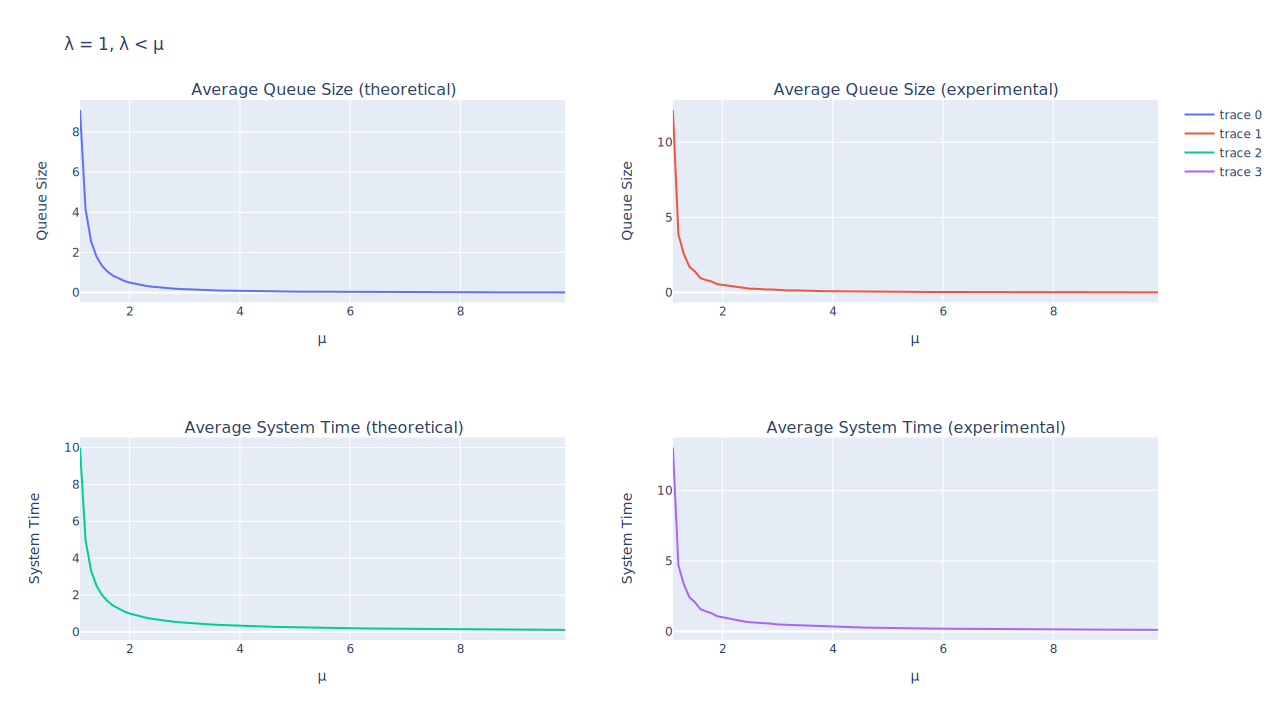

In [32]:
plot_metrics_parameter_dependency(1, list(np.arange(1.1, 10.0, 0.1)), plot_theoretical=True)